<a href="https://colab.research.google.com/github/hliu-3/stat494/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nagel-Schreckenberg traffic modeling

## （a). - (c).

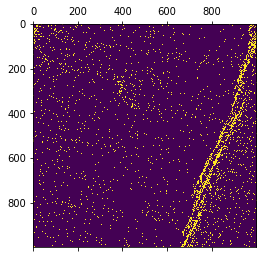

In [1]:



import numpy as np
import scipy.stats as scst
import matplotlib.pyplot as plt
import random

def initialize(M, N):
    x = np.zeros(N)
    for i in range(0, N):
        x[i] = round(i * (M / N))
    v = np.zeros(N)
    d = np.zeros(N)
    for i in range(0, N):
        if (i + 1) >= x.size:
            d[i] = abs(x[0] + (M - x[i]))
        else:
            d[i] = abs(x[i + 1] - x[i])
    return x, v, d

def NS_update(M, x, v, d, p, vmax, mode=1):
# The mode==1 scenario is the original setting
  if (mode==1):
    prob1 = scst.bernoulli.rvs(p, size=1)
    v = min(vmax, (v + 1))
    v = min((d - 1), v)
    if prob1[0] == 1:
        v = max(0, (v - 1))
    v = max(0,v)
    # Problem 1(c)
    x = (x + v) % M
    return x, v
  elif (mode==2):
# The mode==2 scenario lets a car slow down before letting it go fast. Of course, the distance warning part always stays.  
    prob1 = scst.bernoulli.rvs(p, size=1)
    v = min(vmax, (v + 1))
    v = min((d - 1), v)
    if prob1[0] == 1:
        v = max(0, (v - 1))
    v = max(0,v)
    # Problem 1(c)
    x = (x + v) % M
    return x, v
  elif (mode==3):
# The mode==3 scenario is when we want to slow down before adjusting for distance. 
    prob1 = scst.bernoulli.rvs(p, size=1)
    v = min(vmax, (v + 1))
    if prob1[0] == 1:
        v = max(0, (v - 1))
    v = min((d - 1), v)
    v = max(0,v)
    # Problem 1(c)
    x = (x + v) % M
    return x, v
    

def Nagel_Schreckenberg(x, v, d, p, M, N, vmax=35):
    for i in range(0, N):
        (x[i], v[i]) = NS_update(M, x[i], v[i], d[i], p, vmax,2)
    for i in range(0, N):
        j = i + 1
        if j >= x.size:
            j = 0
        if abs(x[j] - x[i]) > 500:
            d[i] = abs(x[j] + (M - x[i]))
        else:
            d[i] = abs(x[j] - x[i])
    return x, v, d

# The function uses for problem 1f, that adjust for the previous car distance, such that a car will only slow down if it has realistic danger to collide with the car before. 

def simulate(p=1/3, M=1000, N=50):
    x, v, d = initialize(M, N)
    for i in range(0, 2500):
        x, v, d = Nagel_Schreckenberg(x, v, d, p, M, N)
    graph = np.zeros((M, M))
    for i in range(1000):
        x, v, d = Nagel_Schreckenberg(x, v, d, p, M, N)
        for j in range(N):
            graph[i, round(x[j])] = 1
    plt.matshow(graph)
    plt.show()


if __name__ == '__main__':
  simulate()

## (e).

Here is the result of removing the possibility of deceleration.  The plots become dashed lines. 

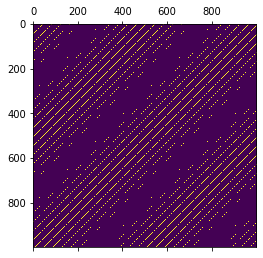

In [ ]:
simulate(p=0)

## (f). 

Here is the code that adopts Sarah's update. The graph looks pretty random. 

In [ ]:
def NSTL_update(M,vfront, x, v, d, p, vmax, mode):
# The mode==1 scenario is the original setting
  if (mode==1):
    prob1 = scst.bernoulli.rvs(p, size=1)
    v = min(vmax, (v + 1))
    # Note that if the car in front travels vfront units, keeping a speed of (d + vfront -1) is safe. 
    v = min((d + vfront - 1), v)
    if prob1[0] == 1:
        v = max(0, (v - 1))
    v = max(0,v)
    # Problem 1(c)
    x = (x + v) % M
    return x, v
  elif (mode==2):
# The mode==2 scenario lets a car slow down before letting it go fast. Of course, the distance warning part always stays.  
    prob1 = scst.bernoulli.rvs(p, size=1)
    v = min(vmax, (v + 1))
    v = min((d + vfront - 1), v)
    if prob1[0] == 1:
        v = max(0, (v - 1))
    v = max(0,v)
    # Problem 1(c)
    x = (x + v) % M
    return x, v
  elif (mode==3):
# The mode==3 scenario is when we want to slow down before adjusting for distance. 
    prob1 = scst.bernoulli.rvs(p, size=1)
    v = min(vmax, (v + 1))
    if prob1[0] == 1:
        v = max(0, (v - 1))
    v = min((d + vfront - 1), v)
    v = max(0,v)
    # Problem 1(c)
    x = (x + v) % M
    return x, v

In [ ]:
def Nagel_Schreckenberg_Tannert_Lerner(x, v, d, p, M, N, vmax=35):
    vtem = v[0]
    for i in range(N-1):
        (x[i], v[i]) = NSTL_update(M, v[i+1],x[i], v[i], d[i], p, vmax,1)
    (x[N-1], v[N-1]) = NSTL_update(M, vtem,x[N-1], v[N-1], d[N-1], p, vmax,1)  #Car 0 is right in front of Car N-1
    for i in range(0, N):
        j = i + 1
        if j >= x.size:
            j = 0
        if abs(x[j] - x[i]) > 500:
            d[i] = abs(x[j] + (M - x[i]))
        else:
            d[i] = abs(x[j] - x[i])
    return x, v, d

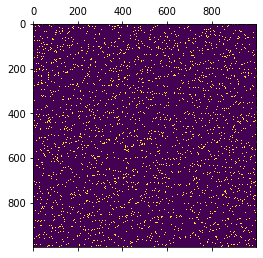

In [ ]:
def simulate_TL(p=1/3, M=1000, N=50,Tpre=2500, T=1000):
    x, v, d = initialize(M, N)
    for i in range(Tpre):
        x, v, d = Nagel_Schreckenberg_Tannert_Lerner(x, v, d, p, M, N)
    graph = np.zeros((M, T))
    for i in range(T):
        x, v, d = Nagel_Schreckenberg_Tannert_Lerner(x, v, d, p, M, N)
        for j in range(N):
            graph[i, round(x[j])] = 1
    plt.matshow(graph)
    plt.show()


if __name__ == '__main__':
  simulate_TL()

# Cutie Pie:



In Monte Carlo simulations, random numbers are used to generate samples to estimate an integral or to simulate a system. In traditional pseudorandom number generators, the random numbers are generated independently and uniformly distributed. However, equidistributed sequences generate random numbers in a way that ensures they are uniformly distributed and have better dispersion over the entire sequence. One example of equidistributed sequences is

$$a,2a,3a,\cdots \mod 1$$

 when $a$ is an irrational number. In the following example, the equidistributed sequence gets one more correct digit than the original sequence. 

In [ ]:
import random

a = np.sqrt(5)
b = np.sqrt(7)

mode = 0

def monte_carlo_pi(n):
    inside = 0
    for i in range(n):
        x = i*a % 1
        y = i*b % 1
        if x**2 + y**2 <= 1:
            inside += 1
    return 4 * inside / n

n = 1000000
pi = monte_carlo_pi(n)
print("Estimated value of pi after {} iterations by equidistributed sequence: {}".format(n, pi))

Estimated value of pi after 1000000 iterations: 3.141416


In [ ]:
import random

a = np.sqrt(5)
b = np.sqrt(7)

mode = 0

def monte_carlo_pi(n):
    inside = 0
    for i in range(n):
        x = random.random()
        y = random.random()
        if x**2 + y**2 <= 1:
            inside += 1
    return 4 * inside / n

n = 1000000
pi = monte_carlo_pi(n)
print("Estimated value of pi after {} iterations by equidistributed sequence: {}".format(n, pi))

Estimated value of pi after 1000000 iterations by equidistributed sequence: 3.144216
